In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from pandas.plotting import scatter_matrix
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np

In [3]:
names1 = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19',
          'F20','F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28','29', 'F30', 'F31', 'F32','F33', 'F34', 'F35',
          'F36','F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44','45', 'F46', 'F47', 'F48','F49', 'F50', 'F51', 'F52', 
          'F53', 'F54', 'F55','F56', 'F57', 'F58', 'F59', 'F60','F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67','F68', 
          'F69', 'F70','F71', 'F72','Valence','Arousal']

# happy_df = pd.read_csv(dirname + datasethappy, header=0, names=names1)
df = pd.read_csv('C:/Users/DELL/S01/finals/Final_mfcc_Train_S01.csv',  header =None, index_col=None,names=names1)


In [4]:
df=df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [5]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F65,F66,F67,F68,F69,F70,F71,F72,Valence,Arousal
0,45.00,66.10,-20.6,-36.5,-8.25,-13.6,7.57,-10.50,-45.2,-53.00,...,-15.90,-26.20,25.4000,4.89,-45.50,-71.5,-70.3,-77.30,1.0,1.0
1,52.30,85.20,10.4,19.5,-25.40,-27.7,-8.10,4.32,15.2,8.46,...,-11.50,-16.40,22.5000,36.30,-18.10,-71.0,-55.2,2.19,1.0,1.0
2,7.62,15.00,-16.8,-20.8,135.00,65.2,-16.80,-2.30,10.0,6.02,...,-1.33,9.78,-28.9000,-18.30,23.70,58.1,59.8,37.00,1.0,1.0
3,-5.88,-8.53,-26.5,-39.0,-34.90,-44.8,-40.70,-38.90,20.8,64.70,...,3.66,17.60,-0.0467,-3.93,-1.07,15.8,33.1,34.30,1.0,1.0
4,3.23,9.13,-13.2,-18.7,-30.10,-33.2,2.85,20.30,10.9,-13.70,...,7.49,17.20,-15.9000,-5.11,25.70,53.2,64.2,69.40,1.0,1.0


In [6]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F65,F66,F67,F68,F69,F70,F71,F72,Valence,Arousal
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,...,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.000686,0.000871,0.001799,0.000926,-0.000576,-0.000517,-0.002297,0.000498,-0.000290,-0.001977,...,0.000489,-0.001997,0.000522,0.000257,-0.001148,-0.001593,-0.000297,-0.001199,0.000000,0.000000
std,20.749973,35.703958,31.017005,41.656940,30.809207,34.024614,30.864090,28.061227,32.300316,48.621158,...,21.904235,32.681913,26.656454,23.509190,30.237163,50.913991,47.589578,49.876249,1.001061,1.001061
min,-35.400000,-71.900000,-61.800000,-100.000000,-56.800000,-81.500000,-79.500000,-83.700000,-110.000000,-183.000000,...,-37.200000,-72.000000,-62.400000,-54.600000,-120.000000,-200.000000,-178.000000,-144.000000,-1.000000,-1.000000
25%,-14.900000,-27.625000,-20.425000,-27.225000,-22.325000,-26.725000,-22.100000,-17.950000,-21.875000,-33.400000,...,-14.900000,-22.700000,-18.000000,-16.025000,-21.300000,-30.875000,-32.350000,-31.875000,-1.000000,-1.000000
50%,-4.215000,-5.120000,-4.550000,-0.838000,-4.205000,-1.038500,-3.460000,-2.375000,0.882500,3.020000,...,-3.900000,-2.110000,-2.200000,1.735000,1.435000,3.130000,1.430000,2.085000,0.000000,0.000000
75%,10.225000,23.425000,13.025000,25.900000,17.200000,22.425000,18.625000,19.100000,20.725000,33.275000,...,9.157500,20.900000,14.100000,14.825000,21.025000,33.000000,30.525000,33.700000,1.000000,1.000000
max,151.000000,122.000000,120.000000,133.000000,135.000000,136.000000,123.000000,99.100000,108.000000,133.000000,...,104.000000,90.800000,110.000000,84.400000,105.000000,130.000000,149.000000,157.000000,1.000000,1.000000


In [7]:
print(df.describe().T)  #Values need to be normalized before fitting. 

         count      mean        std    min     25%    50%     75%    max
F1       472.0  0.000686  20.749973  -35.4 -14.900 -4.215  10.225  151.0
F2       472.0  0.000871  35.703958  -71.9 -27.625 -5.120  23.425  122.0
F3       472.0  0.001799  31.017005  -61.8 -20.425 -4.550  13.025  120.0
F4       472.0  0.000926  41.656940 -100.0 -27.225 -0.838  25.900  133.0
F5       472.0 -0.000576  30.809207  -56.8 -22.325 -4.205  17.200  135.0
...        ...       ...        ...    ...     ...    ...     ...    ...
F70      472.0 -0.001593  50.913991 -200.0 -30.875  3.130  33.000  130.0
F71      472.0 -0.000297  47.589578 -178.0 -32.350  1.430  30.525  149.0
F72      472.0 -0.001199  49.876249 -144.0 -31.875  2.085  33.700  157.0
Valence  472.0  0.000000   1.001061   -1.0  -1.000  0.000   1.000    1.0
Arousal  472.0  0.000000   1.001061   -1.0  -1.000  0.000   1.000    1.0

[74 rows x 8 columns]


In [8]:
print(df.isnull().sum())

F1         0
F2         0
F3         0
F4         0
F5         0
          ..
F70        0
F71        0
F72        0
Valence    0
Arousal    0
Length: 74, dtype: int64


In [9]:
print(df.dtypes)

F1         float64
F2         float64
F3         float64
F4         float64
F5         float64
            ...   
F70        float64
F71        float64
F72        float64
Valence    float64
Arousal    float64
Length: 74, dtype: object


In [10]:
X = df.drop(labels = ["Valence", "Arousal"], axis=1) 

In [16]:
###Scaling the inputs
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X)

# min_max=MinMaxScaler()
# # X_train=X_test=min_max.fit_transform(X)
# print(min_max.fit(X))
# # min_max.transform(test)

In [17]:
scaled

array([[0.43133047, 0.71170707, 0.22662266, ..., 0.38939394, 0.3293578 ,
        0.22159468],
       [0.47049356, 0.81021145, 0.39713971, ..., 0.39090909, 0.37553517,
        0.48568106],
       [0.23079399, 0.44816916, 0.24752475, ..., 0.78212121, 0.72721713,
        0.6013289 ],
       ...,
       [0.12821888, 0.25941207, 0.13586359, ..., 0.66606061, 0.58012232,
        0.44385382],
       [0.25482833, 0.5337803 , 0.33873487, ..., 0.53      , 0.48868502,
        0.43355482],
       [0.07349785, 0.15162455, 0.02420242, ..., 0.62018182, 0.64159021,
        0.63222591]])

In [18]:
X_train=X_test=scaled
yval_train=yval_test=df['Valence'] #train entire valence dataframe
yaro_train=yaro_test=df['Arousal'] #train entire arousal dataframe

In [19]:
X_train

array([[0.43133047, 0.71170707, 0.22662266, ..., 0.38939394, 0.3293578 ,
        0.22159468],
       [0.47049356, 0.81021145, 0.39713971, ..., 0.39090909, 0.37553517,
        0.48568106],
       [0.23079399, 0.44816916, 0.24752475, ..., 0.78212121, 0.72721713,
        0.6013289 ],
       ...,
       [0.12821888, 0.25941207, 0.13586359, ..., 0.66606061, 0.58012232,
        0.44385382],
       [0.25482833, 0.5337803 , 0.33873487, ..., 0.53      , 0.48868502,
        0.43355482],
       [0.07349785, 0.15162455, 0.02420242, ..., 0.62018182, 0.64159021,
        0.63222591]])

In [20]:
print(X)

        F1     F2      F3    F4      F5     F6      F7     F8     F9     F10  \
0    45.00  66.10 -20.600 -36.5   -8.25 -13.60   7.570 -10.50 -45.20  -53.00   
1    52.30  85.20  10.400  19.5  -25.40 -27.70  -8.100   4.32  15.20    8.46   
2     7.62  15.00 -16.800 -20.8  135.00  65.20 -16.800  -2.30  10.00    6.02   
3    -5.88  -8.53 -26.500 -39.0  -34.90 -44.80 -40.700 -38.90  20.80   64.70   
4     3.23   9.13 -13.200 -18.7  -30.10 -33.20   2.850  20.30  10.90  -13.70   
..     ...    ...     ...   ...     ...    ...     ...    ...    ...     ...   
467 -19.30 -35.30 -24.200 -26.8   41.60  56.90 -67.600 -53.60  45.40  122.00   
468  -1.22   4.58  66.700  89.8   47.30  61.10  -2.030  22.50  21.50   10.20   
469 -11.50 -21.60 -37.100 -56.0  -13.30 -13.20  -2.230 -11.20  -6.36    6.61   
470  12.10  31.60  -0.218  13.7    2.91  15.70   1.360  20.10  32.00   40.40   
471 -21.70 -42.50 -57.400 -91.6   -2.32   5.57  -0.428  13.00  15.40   39.50   

     ...    F63    F64    F65    F66   

In [21]:
from sklearn.preprocessing import LabelEncoder
Y_val =df["Valence"].values
Y_aro =df["Arousal"].values
# Encoding categorical data
# labelencoder = LabelEncoder()
# Y_val = labelencoder.fit_transform(Y_val) 
# Y_aro = labelencoder.fit_transform(Y_aro) 

In [22]:
Y_val

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [23]:
Y_aro

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [24]:
X_train.shape

(472, 72)

In [25]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [26]:
# import numpy as np
# unique_elements, counts_elements = np.unique(y_train, return_counts=True)
# print(np.asarray((unique_elements, counts_elements)))
####################################################################
# Over-Complex network
# More complex than needed 

# model = Sequential()
# model.add(Dense(128, input_dim=30, activation='relu')) 
# model.add(Dropout(0.5))
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(8))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1)) 
# model.add(Activation('sigmoid'))  
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',             #also try adam
#               metrics=['accuracy'])

# #model.compile(loss='mean_squared_error', optimizer='adam')
# print(model.summary())


##################################################################
# Complex network
# Still complex but may work...

# model = Sequential()
# model.add(Dense(16, input_dim=30, activation='relu')) 
# model.add(Dropout(0.5))
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1)) 
# model.add(Activation('sigmoid'))  
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',             #also try adam
#               metrics=['accuracy'])

# #model.compile(loss='mean_squared_error', optimizer='adam')
# print(model.summary())
####################################################################
#Simple network 1
# Appropriate architecture for the challenge

# model = Sequential()
# model.add(Dense(16, input_dim=30, activation='relu')) 
# model.add(Dropout(0.2))
# model.add(Dense(1)) 
# model.add(Activation('sigmoid'))  
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',             #also try adam
#               metrics=['accuracy'])

# #model.compile(loss='mean_squared_error', optimizer='adam')
# print(model.summary())


#####################################################################



In [18]:
#Simple network 2
# Too simple??

model = Sequential()
model.add(Dense(16, input_dim=72, activation='relu')) 
model.add(Dropout(0.02))
model.add(Dense(1)) 
model.add(Dropout(0.02))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1168      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 1,187
Trainable params: 1,187
Non-trainabl

In [19]:
###########################################################

# Fit with early stopping and model checkpoint to save the best models. 
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# # patient early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# mc = ModelCheckpoint('models/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# # evaluate the model
# history = model.fit(X_train, y_train ,verbose=1, epochs=500, batch_size=64,
#                     validation_data=(X_test, y_test), callbacks=[es, mc])

#Fit with no early stopping or other callbacks
history = model.fit(X_train, Y_val,verbose=1, epochs=500, batch_size=128,
                    validation_data=(X_test, Y_val))


Epoch 1/500
4/4 [==============================] - 1s 111ms/step - loss: 193.7829 - accuracy: 0.2521 - val_loss: 172.3372 - val_accuracy: 0.2500
Epoch 2/500
4/4 [==============================] - 0s 21ms/step - loss: 161.8384 - accuracy: 0.2521 - val_loss: 139.3701 - val_accuracy: 0.2500
Epoch 3/500
4/4 [==============================] - 0s 22ms/step - loss: 126.7234 - accuracy: 0.2627 - val_loss: 106.4801 - val_accuracy: 0.2542
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 95.7020 - accuracy: 0.2860 - val_loss: 75.0479 - val_accuracy: 0.3072
Epoch 5/500
4/4 [==============================] - 0s 20ms/step - loss: 63.1132 - accuracy: 0.3284 - val_loss: 46.8105 - val_accuracy: 0.3644
Epoch 6/500
4/4 [==============================] - 0s 22ms/step - loss: 39.4151 - accuracy: 0.3877 - val_loss: 27.0312 - val_accuracy: 0.4788
Epoch 7/500
4/4 [==============================] - 0s 33ms/step - loss: 25.5205 - accuracy: 0.4958 - val_loss: 20.5671 - val_accuracy: 0.5403

In [20]:
# Accuracy

_, acc = model.evaluate(X_train, Y_val)
print("Accuracy = ", (acc * 100.0), "%")



15/15 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9958
Accuracy =  99.57627058029175 %


In [21]:
# from sklearn.externals import joblib
import pickle
filename = 'Valfinalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://5d5995a4-a7ad-4e9f-9194-e2c381f2cc79/assets


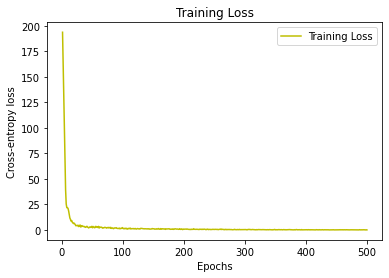

In [22]:
# prediction_test = model.predict(X_test)    
# print(y_test, prediction_test)
# print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy loss')
plt.legend()
plt.show()



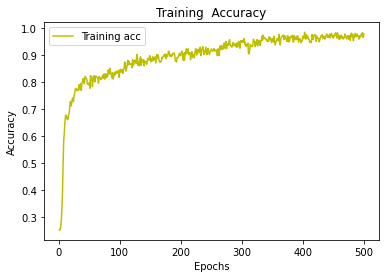

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
##model predictions
###model already knows there are two outputs from the definition
# predictions = model.predict(X_test)
y_pred_val= model.predict(X_test)


15/15 [==============================] - 0s 2ms/step


In [25]:
y_pred_val.shape

(472, 1)

In [26]:
y_pred_val = y_pred_val.reshape([472,]) ##Reshape needed for deriving table of actual vs predicted values
y_pred_val

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [41]:
y_pred_val = (y_pred_val > 0)#needed for deriving confusion matrix

In [42]:
#Memory test for Valence
cm = confusion_matrix(y_pred_val, Y_val)
cm

array([[234,   0],
       [  2, 236]], dtype=int64)

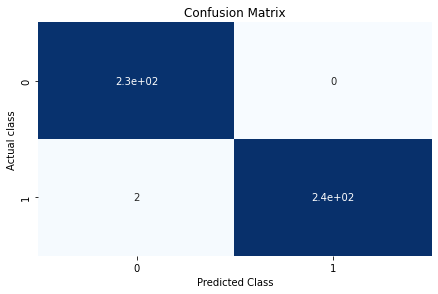

In [43]:
cv=np.arange(2,3)

dataframe=pd.DataFrame(cm)

# Create heatmap

sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')

plt.title('Confusion Matrix'), plt.tight_layout()

plt.ylabel('Actual class'), plt.xlabel('Predicted Class')

plt.show()

In [45]:
from sklearn.metrics import classification_report

print(classification_report( Y_val,y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       236
           1       0.99      1.00      1.00       236

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472



<AxesSubplot:>

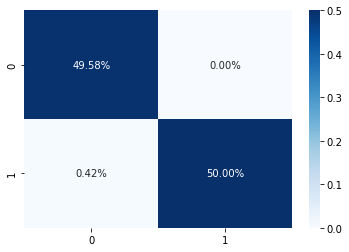

In [44]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [32]:
Y_val.shape

(472,)

In [33]:
y_pred_val

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [34]:
y_pred_val.shape

(472,)

In [35]:
output = pd.DataFrame({'Actual': Y_val, 'Predicted': y_pred_val})
output

,Actual,Predicted
0,1,True
1,1,True
2,1,True
3,1,True
4,1,True
...,...,...
467,0,False
468,0,False
469,0,False
470,0,False


In [38]:
# Too simple??

model_aro = Sequential()
model_aro.add(Dense(16, input_dim=72, activation='relu')) 
model_aro.add(Dropout(0.02))
model_aro.add(Dense(1)) 
model_aro.add(Dropout(0.02))
model_aro.add(Dense(1)) 
model_aro.add(Activation('sigmoid'))  
model_aro.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam')
print(model_aro.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                1168      
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
 dropout_7 (Dropout)         (None, 1)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,187
Trainable params: 1,187
Non-traina

In [39]:
###########################################################

# Fit with early stopping and model checkpoint to save the best models. 
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# # patient early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# mc = ModelCheckpoint('models/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# # evaluate the model
# history = model.fit(X_train, y_train ,verbose=1, epochs=500, batch_size=64,
#                     validation_data=(X_test, y_test), callbacks=[es, mc])

#Fit with no early stopping or other callbacks
history = model_aro.fit(X_train, Y_aro,verbose=1, epochs=500, batch_size=128,
                    validation_data=(X_test, Y_aro))


Epoch 1/500
4/4 [==============================] - 1s 72ms/step - loss: 14.9164 - accuracy: 0.6801 - val_loss: 10.2212 - val_accuracy: 0.7161
Epoch 2/500
4/4 [==============================] - 0s 18ms/step - loss: 10.5416 - accuracy: 0.7246 - val_loss: 9.0772 - val_accuracy: 0.7288
Epoch 3/500
4/4 [==============================] - 0s 17ms/step - loss: 10.2799 - accuracy: 0.7352 - val_loss: 7.7991 - val_accuracy: 0.7500
Epoch 4/500
4/4 [==============================] - 0s 22ms/step - loss: 8.5019 - accuracy: 0.7521 - val_loss: 7.0129 - val_accuracy: 0.7775
Epoch 5/500
4/4 [==============================] - 0s 18ms/step - loss: 8.8599 - accuracy: 0.7648 - val_loss: 6.2506 - val_accuracy: 0.7860
Epoch 6/500
4/4 [==============================] - 0s 15ms/step - loss: 7.4220 - accuracy: 0.7924 - val_loss: 5.6531 - val_accuracy: 0.7881
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 8.0418 - accuracy: 0.7542 - val_loss: 5.1284 - val_accuracy: 0.7881
Epoch 8/500
4/4 

In [40]:
# Accuracy

_, acc = model_aro.evaluate(X_train, Y_aro)
print("Accuracy = ", (acc * 100.0), "%")


15/15 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000
Accuracy =  100.0 %


In [54]:
filenamearo = 'Arofinalized_model.sav'
pickle.dump(model_aro, open(filenamearo, 'wb'))

INFO:tensorflow:Assets written to: ram://93660434-1c4a-4ef4-8de6-f71573b96a9c/assets


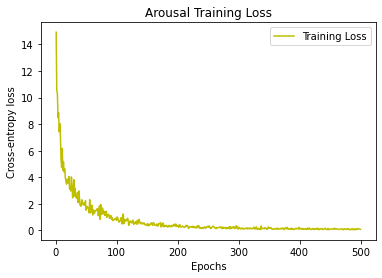

In [41]:
# prediction_test = model.predict(X_test)    
# print(y_test, prediction_test)
# print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Arousal Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy loss')
plt.legend()
plt.show()

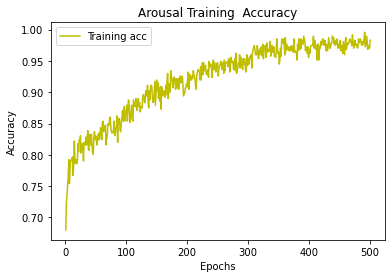

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Arousal Training  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
##model predictions
###model already knows there are two outputs from the definition
# predictions = model.predict(X_test)
y_pred_aro= model_aro.predict(X_test)
y_pred_aro = (y_pred_aro > 0.5)

15/15 [==============================] - 0s 2ms/step


In [45]:
y_pred_aro = y_pred_aro.reshape([472,]) #Reshape needed for deriving table of actual vs predicted values
y_pred_aro

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
y_pred_aro = (y_pred_aro > 0.5)#needed for deriving confusion matrix

In [47]:
#Memory test for Valence
cm2 = confusion_matrix(y_pred_aro, Y_aro)
cm2

array([[236,   0],
       [  0, 236]], dtype=int64)

<AxesSubplot:>

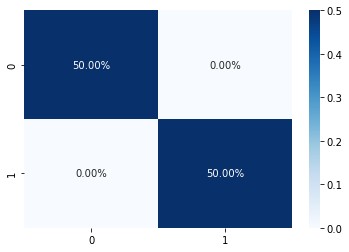

In [48]:
sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')

In [49]:
output = pd.DataFrame({'Actual': Y_val, 'Predicted': y_pred_val})
output

,Actual,Predicted
0,1,True
1,1,True
2,1,True
3,1,True
4,1,True
...,...,...
467,0,False
468,0,False
469,0,False
470,0,False


In [ ]:
names1 = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7','F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19',
          'F20','F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28','29', 'F30', 'F31', 'F32','F33', 'F34', 'F35',
          'F36','F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44','45', 'F46', 'F47', 'F48','F49', 'F50', 'F51', 'F52', 
          'F53', 'F54', 'F55','F56', 'F57', 'F58', 'F59', 'F60','F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67','F68', 
          'F69', 'F70','F71', 'F72','Valence','Arousal']

# happy_df = pd.read_csv(dirname + datasethappy, header=0, names=names1)
df = pd.read_csv('C:/Users/DELL/S01/finals/Final_mfcc_EC_S01.csv',  header =None, index_col=None,names=names1)
